<a href="https://colab.research.google.com/github/ARSHIA2907/Robotic-WAAM-Bead-characteristics-Prediction-forward-mapping-/blob/main/Weld_Bead_Characteristics_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv("finalxgb.csv")
X= dataset.iloc[:,:-2]
Y= dataset.iloc[:,-2:]
print(X)
print(Y)


     WD   WFS  WFS/TS
0   0.8  2.36    7.87
1   0.8  2.90    7.26
2   0.8  4.01    8.01
3   0.8  4.80    8.00
4   0.8  5.66    8.08
..  ...   ...     ...
79  1.2  2.66   13.29
80  1.2  3.44   13.74
81  1.2  4.20   13.98
82  1.2  4.81   13.75
83  1.2  5.36   13.39

[84 rows x 3 columns]
       W     H
0   2.52  2.00
1   3.10  1.77
2   3.74  1.81
3   4.18  1.69
4   3.99  1.67
..   ...   ...
79  7.07  3.04
80  7.14  3.34
81  7.17  3.39
82  7.75  3.02
83  7.85  3.01

[84 rows x 2 columns]


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
from sklearn.multioutput import MultiOutputRegressor
from xgboost import plot_tree

In [ ]:
xtrain, xtest, ytrain, ytest=train_test_split(X, Y, test_size=0.11)
print(xtest)
print(ytest)


     WD    WFS  WFS/TS
61  1.0   7.40   18.50
53  1.0   7.28   13.65
35  0.8   9.31   15.52
58  1.0   4.27   17.06
29  0.8   4.82   16.07
68  1.2   4.66    6.66
62  1.0   8.17   18.15
28  0.8   3.64   14.55
83  1.2   5.36   13.39
24  0.8  12.22   13.09
       W     H
61  8.65  2.85
53  7.14  2.44
35  6.20  2.14
58  7.05  3.00
29  4.61  2.38
68  6.25  2.24
62  8.83  2.55
28  4.39  2.40
83  7.85  3.01
24  5.68  1.94


In [ ]:
xgbr = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror')).fit(X, Y)
print(xgbr)

MultiOutputRegressor(estimator=XGBRegressor(objective='reg:squarederror'))


In [ ]:
score = xgbr.score(xtrain, ytrain)  
print("Training score: ", score)

Training score:  0.993869366305999


In [ ]:
ypredr = xgbr.predict(xtest)
print(ypredr)
print(ytest)

[[8.631408  2.8451974]
 [7.0012116 2.406752 ]
 [5.981232  2.1520164]
 [7.003785  2.988225 ]
 [4.817716  2.3831213]
 [6.257227  2.234221 ]
 [8.738649  2.581206 ]
 [4.372979  2.4161966]
 [7.7145267 2.9566112]
 [5.578613  1.960797 ]]
       W     H
61  8.65  2.85
53  7.14  2.44
35  6.20  2.14
58  7.05  3.00
29  4.61  2.38
68  6.25  2.24
62  8.83  2.55
28  4.39  2.40
83  7.85  3.01
24  5.68  1.94


In [ ]:
ypreds = xgbr.predict(xtrain)
print(ypreds)
pd.set_option('display.max_rows', None)
print(ytrain)

[[5.8548684 2.249819 ]
 [5.775212  2.1003125]
 [4.523922  1.6740924]
 [4.525357  1.6591023]
 [4.526847  3.3533497]
 [6.519203  2.76584  ]
 [5.7474327 1.9956394]
 [5.8712    2.0392153]
 [3.4394019 2.9272237]
 [6.5509696 2.5013993]
 [4.977669  1.8881578]
 [6.7012806 2.82099  ]
 [6.2263618 2.3521473]
 [6.220359  3.242505 ]
 [6.720949  3.0690486]
 [6.3152547 2.2095375]
 [6.252016  3.5255826]
 [5.7521515 2.0400405]
 [2.4337587 2.0049067]
 [5.816565  1.9956394]
 [7.3346825 3.3285987]
 [5.0268927 1.6718026]
 [4.5965858 2.2687266]
 [5.5697503 3.2075787]
 [7.0825653 2.657108 ]
 [7.282432  3.0007885]
 [7.1567874 2.4004319]
 [3.0862691 1.7865123]
 [4.830917  1.6835601]
 [3.602126  2.5963688]
 [6.9801273 2.406752 ]
 [5.3296604 1.9636744]
 [4.8215976 2.4046931]
 [4.159317  1.6806959]
 [4.0537477 2.7154124]
 [5.7261047 2.2129412]
 [3.5483515 2.2575872]
 [5.6806064 2.2099557]
 [2.9813368 2.5340478]
 [5.5370207 2.2881832]
 [7.0248837 3.1059818]
 [6.07066   3.069023 ]
 [5.30132   3.4101315]
 [5.025613 

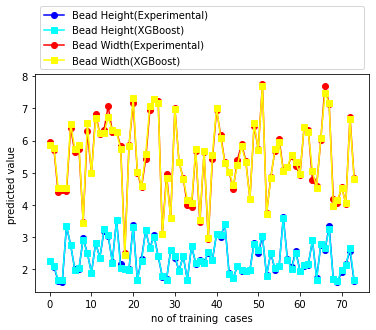

In [ ]:
x_ax = range(len(ytrain))
plt.plot(x_ax, ytrain.iloc[:,-1], label="Bead Height(Experimental)",color='blue', marker='o')
plt.plot(x_ax, ypreds[:,-1], label="Bead Height(XGBoost) ",color='cyan', marker='s')
plt.plot(x_ax, ytrain.iloc[:,-2], label="Bead Width(Experimental)",color='red', marker='o')
plt.plot(x_ax, ypreds[:,-2], label="Bead Width(XGBoost)",color='yellow', marker='s')


plt.xlabel("no of training  cases")
plt.ylabel("predicted value ")
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=1)

plt.show()

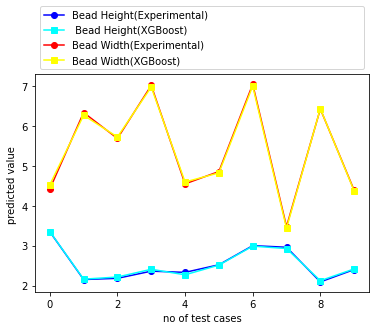

In [ ]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest.iloc[:,-1], label="Bead Height(Experimental)",color='blue', marker='o')
plt.plot(x_ax, ypredr[:,-1], label=" Bead Height(XGBoost)",color='cyan', marker='s')
plt.plot(x_ax, ytest.iloc[:,-2], label="Bead Width(Experimental)",color='red', marker='o')
plt.plot(x_ax, ypredr[:,-2], label="Bead Width(XGBoost)",color='yellow', marker='s')

plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=1)
plt.xlabel("no of test cases")
plt.ylabel("predicted value ")

plt.show()